### Constructing Prediction Model for the Risk of Stroke

### Abstract

The ultimate aim of this project is to answer the following questions:
- Is the use of Organs from donors who experienced brain death due to stroke associated with a higher mortality and higher primary graft dysfunction? 
    - One [Study](https://www.jacc.org/doi/10.1016/j.jacc.2022.01.013) shows that Recipients of younger donors (<= 40 y) whose cause of brain death was due to stroke has a higher risk of mortality than recipients of younger donors whose cause of brain death was not due to stroke.  

In this project, a Stroke prediction model has been developed based on patient attributes. Here is the highlevel summary
- Used Stroke dataset from Kaggle Dataset Repositories
- Problem: 
    - Supervised Binary Classification
    - False negative should be minimized ideally
    - Imbalanced dataset leading to poor precision (Tried oversampling and undersampling techniques)
    - BMI - Missing values mean imputation (Tried age based imputation in real file)
    - BMI Outlier identification and imputation
    - Univariate Analysis: Except residence type, all features was related to risk of having stroke
    - Avg Glucose level shows bimodal distribution (normal group vs. diabetic group)
    - Chi-Square: Hypertension, Heart disease, Stroke - All showed pairwise correlation
    - Used LabelEncoder from sklearn.preprocessing and then performed Multicollinearity Analysis
    - Ever married & Age were correlated (0.68). Age contained more info regarding stroke risk, dropped ever married
    - Tried 7 algorithms (Decision Tree, Logistic Regression, Random Forest, SVM, KNN, Naive Bayes, KMeans Clustering) ignoring Class rebalancing
    - Logistic Regression, kNN, Random Forest have high accuracy of 0.95 but low recall (Type 2 Error)
    - Naive Bayes Model has fit our objective although the accuracy is 0.87
    - Used 10 fold CV + Naive Bayes Model, Accuracy range: 84.91% to 89.94%
 

#### Pre-requisites for this project

Supervised binary classification, Performance metrics (Accuracy, Precision, Recall, F1-Score, Type I/II error), Missing value imputation, Outlier treatment, Univariate/Multivariate analysis, Bimodal distribution, Skewness, Chi-square test, Multicollinearity analysis, Label encoding, Algorithms, Cross validation, Imbalanced classification, new feature using polynomial, feature selection 

### 1. Introduction

Notebook Sources: [1](https://medium.com/geekculture/stroke-prediction-d26c15f9d1), [2](https://github.com/mstrems/Stroke-Prediction-Models/blob/master/1Expl_Data_Analysis.ipynb), [3](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8641997/)

Stroke is the fifth leading Cause of Death and third leading cause of disability globally (World Health Organization). 
Stroke is the sudden death of some brain cells due to lack of oxygen when the blood flow to the brain is lost by blockage 
or rupture of an artery to the brain. This leads to dementia and depression.

[**Understanding Stroke**](https://www.stroke.org/)
- Types of stroke
    - **Ischemic Stroke:** Occurs when a blood supply to the brain is obstructed. Accounts for 87 % of all strokes.
    - **Transient ischemic Stroke (TIS):** Temporary Clot, Mini-Stroke. Warning sign stroke and need to be taken seriously
    - **Hemorrhagic Stroke:** Occurs when a blood vessel ruptures. Common cause is uncontrolled High Blood Pressure
    - **Cryptogenic Stroke:** Cause not determined
    - **Brain Stem Stroke:** Stroke occurs in Brain Stem and makes people unable to speak or move below the neck
    
    
- 800,000 people in the United States suffer from a stroke each year, three in four being first-time strokes
- 80% of these strokes can be prevented, so educating people on the signs of stroke is important. Prevention Checklist:
    - Monitor your blood pressure
    - Control your cholesterol
    - Keep your blood sugar down
    - Get active
    - Eat better
    - Lose weight if you need to
    - Don’t smoke, period
    - Talk to your doctor about aspirin or other medications

**Objective:**
To construct a prediction model to predict the stroke and to assess the accuracy of the model

We will explore different models to see which produces reliable and repeatable results

**Problem:**
- The problem is a Supervised Binary Classification (if patient will suffer a stroke or not)
- We are concerned with accuracy and precision (for imbalanced dataset) to identify the patients at risk
- False positive is ok (we err on the safe side).
- False negative should be minimized ideally.

### 2. Data Source

A population of 5110 people are involved in the study (2995 Females and 2115 males). The data is extracted from Kaggle Data Repositories (https://www.kaggle.com/datasets) to predict whether a patient is likely to get a stroke based on the following attributes:
```
1.  id                : unique identifier
2.  gender            : "Male", "Female" or "Other"
3.  age               : age of the patient
4.  hypertension      : 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5.  heart_disease     : 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6.  ever_married      : "No" or "Yes"
7.  work_type         : "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8.  Residence_type    : "Rural" or "Urban"
9.  avg_glucose_level : average glucose level in blood
10. bmi               : body mass index
11. smoking_status    : "formerly smoked", "never smoked", "smokes" or "Unknown"
12. stroke            : 1 if the patient had a stroke, 0 the patient do not have a stroke
```

#### 2.1 Understanding Stroke Attributes in the Data File

- ID: Probably irrelevant unless to avoid duplicates
- Gender: Could be relevant: different risks characteristics for men and women
- **Hypertension:** Relevant:
    - Another name for High Blood Pressure
    - Blood Pressure is the force applied by the blood over the inner walls of the arteries.
    - Could be caused by bad diet (increased consumption of salt) 
    - Normal blood pressure is 120 over 80 mm of mercury (mmHg), but hypertension means it is higher than 130 over 80 mmHg.
        - Systolic BP: Max Pressure the heart exerts while beating
        - Diastolic BP: Amount of Pressure in the arteries between beats
    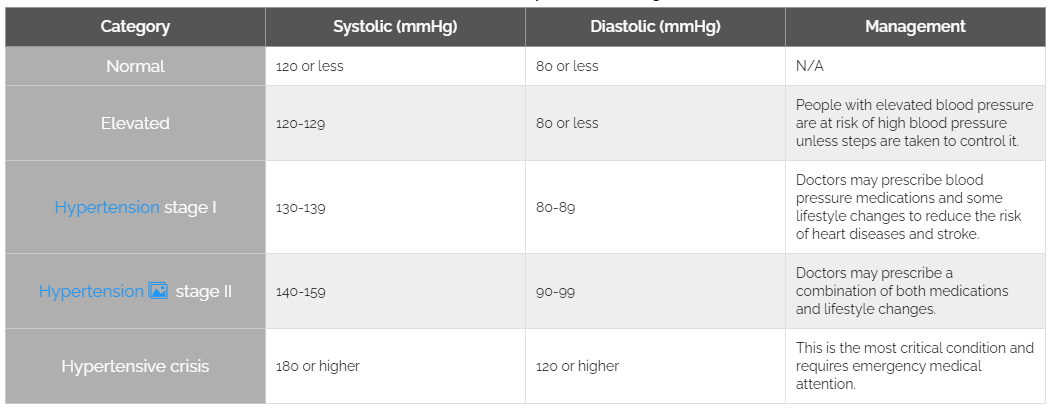
[Image Source](https://www.medicinenet.com/blood_pressure_chart_reading_by_age/article.htm)
- [**Heart Disease:**](https://www.cdc.gov/heartdisease/about.htm) Relevant: 
    - Symptoms:
        - <u>Heart attack<u> (decreased blood flow)
        - Arrhythmia (fluterring feelings in the chest)
        - Heart failure (heart cannot pump enough blood and oxygen)
- **Ever_married:** Lifestyle factor. Is this relevant? - We will need to test.
- **Type_Of_Work:** Lifestyle factor. Is this relevant? - We will need to test.
- **Residence:** Lifestyle factor. Is this relevant? - We will need to test.
- **Avg_Glucose:** Could be relevant. Could create inflammation blocking arteries.
    - Needs to test at least twice per year [source](https://www.healthline.com/health/estimated-average-glucose#bottom-line)
    - Accounts for Blood glucose levels 24 hours/day. For diabetic patients, usually when before a meal
    - For Diabetes, Avg. Glucose Level = 200 mg/dL [source](https://www.cdc.gov/diabetes/basics/getting-tested.html#:~:text=A%20fasting%20blood%20sugar%20level,higher%20indicates%20you%20have%20diabetes)
    - Pre Diabetes, Avg. Glucose Level = 140-199 mg/dL
    - Normal, Avg. Glucose Level = 140 mg/dL or below  

- [Body Mass Index (BMI)](https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm) - Could be relevant
    - Body fat based on height and weight
    - An index for assessing overweight and underweight, obtained by dividing body weight in kg by height in m^2:
    - Underweight = <18.5 | Normal weight = 18.5–24.9 | Overweight = 25–29.9 | Obesity = BMI of 30 or greater

### 3. Importing Libraries and Data

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [70]:
round(data.describe(),2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


Some insights from the uncleaned dataset
- BMI average is quite high. US Avg  = 26.6 (https://www.cdc.gov/nchs/data/nhanes/databriefs/adultweight.pdf).
- 5% of patients suffered stroke.
- We see a wide variance in Avg_Glucose_level
- Need to see if ID is unique or not (same patient seen over time)

### 4. Data Cleaning

In [71]:
data_row_count, data_column_count = data.shape
print('Row Count:', data_row_count)
print('Column Count:', data_column_count)

Row Count: 5110
Column Count: 12


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Looks like bmi feature has missing values. For this analysis, we will impute the missing values with mean of BMI.

In [73]:
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [74]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### 4.1 ID

In [75]:
data.id.nunique()

5110

The total of unique id is same as row count. Let us drop the id column.

In [76]:
data = data.drop(columns ='id')

#### 4.2 Gender

In [77]:
data.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Since we have only 1 Other Gender category, we will impute it with the Mode of Gender column.

In [78]:
data['gender'] = data['gender'].replace('Other', list(data.gender.mode().values)[0])

### 5. Exploratory Data Analysis

#### 5.1 Categorical Feature Analysis

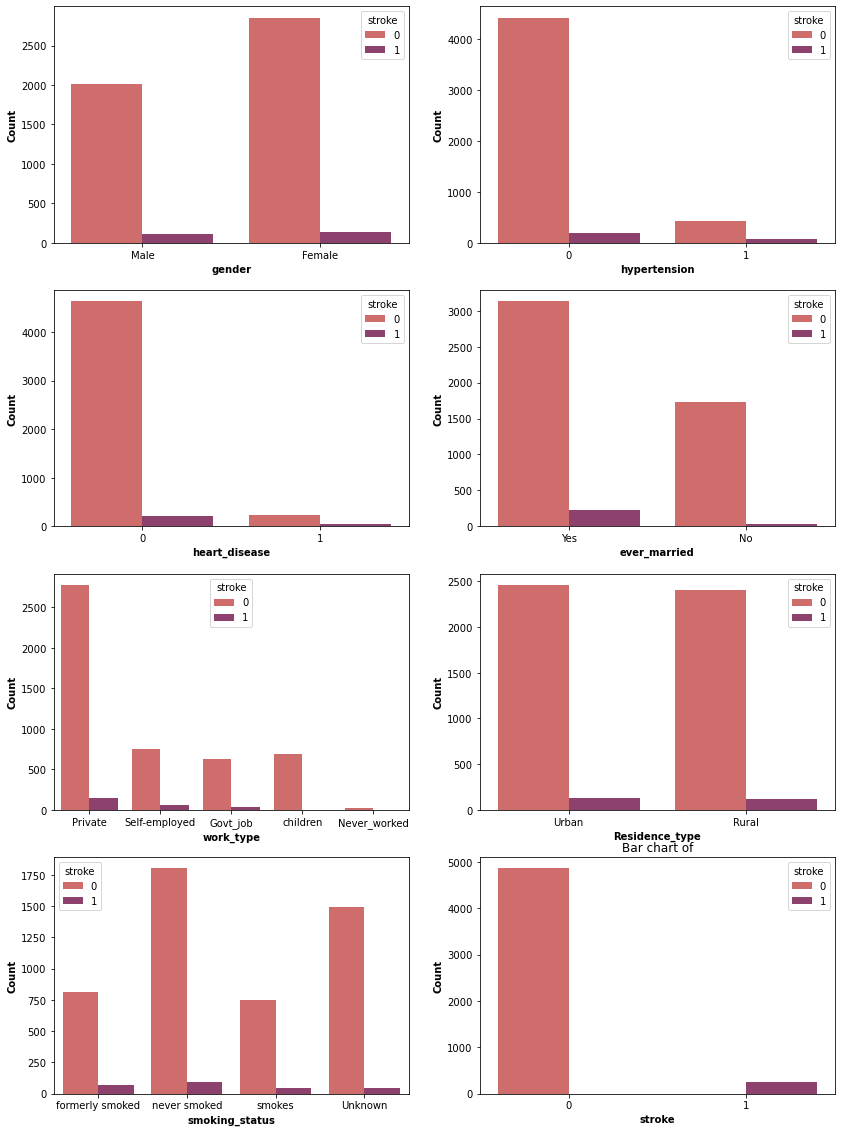

In [79]:
df_cat = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status', 'stroke']

fig, axs = plt.subplots(4, 2, figsize=(14,20))
axs = axs.flatten()

# iterate through each column of df_catd and plot
for i, col_name in enumerate(df_cat):
    sns.countplot(x=col_name, data=data, ax=axs[i], hue =data['stroke'], palette = 'flare')
    plt.title("Bar chart of")
    axs[i].set_xlabel(f"{col_name}", weight = 'bold')
    axs[i].set_ylabel('Count', weight='bold')

From the above plots, some observation can be drawn:

- **hypertension:** Subjects that previously diagnosed with hypertension have highly risk of having stroke.
- **heart disease:** Subjects that previously diagnosed with heart disease have highly risk of having stroke. Hypertension correlates with Heart Disease. Let us test that.
- **ever married:** Subjects that ever married have highly risk of having stroke.
- **work type:** Subjects that have any work experience and in government related work have highly risk of having stroke while those with no work experience barely experienced stroke. Notice that stroke is not common among Children category
- **residence type:** No obvious relationship with likelihood of experiencing stroke.
- **smoking status:** Being a smoker or former smoker increases risk of having a stroke.

#### 5.2 Numerical Feature Analysis

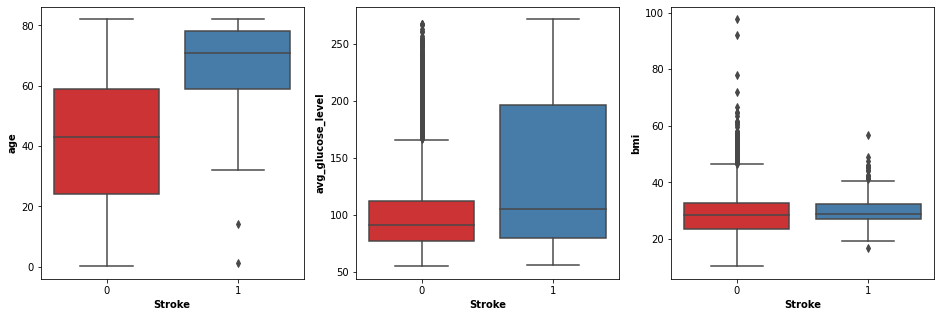

In [80]:
df_num = ['age', 'avg_glucose_level', 'bmi']

fig, axs = plt.subplots(1, 3, figsize=(16,5))
axs = axs.flatten()

# iterate through each column in df_num and plot
for i, col_name in enumerate(df_num):
    sns.boxplot(x="stroke", y=col_name, data=data, ax=axs[i],  palette = 'Set1')
    axs[i].set_xlabel("Stroke", weight = 'bold')
    axs[i].set_ylabel(f"{col_name}", weight='bold')

From the above boxplot, some observations can be drawn:

- **age:** Subjects with stroke tend to have higher mean age.
- **avg glucose level:** Subjects with stroke tend to have higher average glucose level.
- **bmi:** bmi index does not give much indication on the likelihood of experiencing stroke. bmi index for super obesity is 50. Outliers in this feature should be replaced to its highest limit (50).

#### 5.3 Univariate Analysis

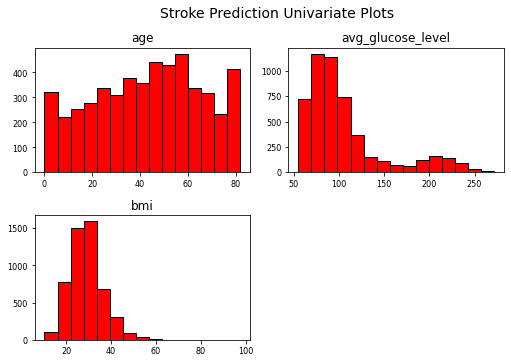

In [81]:
data[df_num].hist(bins=15, color='red', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
rt = plt.suptitle('Stroke Prediction Univariate Plots', x=0.65, y=1.25, fontsize=14)

- Age is approximately normal with mean around 40 y. Spikes for infants and old age.

- Avg_Glucose is not a normal distribution and looks a bit bimodal. The average is approx. 106 with 45 standard deviation.
    - There seems to be a "normal group" around 50 to 140 and a second group (probably diabetic group) from 140-250

- BMI is slightly skewed to the right. Could be because of the outliers that are above 50.

In [82]:
bmi_outliers=data.loc[data['bmi']>50]
bmi_outliers['bmi'].shape

(79,)

There are 79 outliers in bmi that are > 50. So we will replace more than 50 in bmi column to 50.

In [83]:
data["bmi"] = pd.to_numeric(data["bmi"])
data["bmi"] = data["bmi"].apply(lambda x: 50 if x>50 else x)

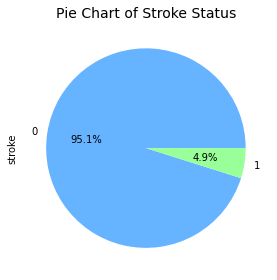

In [84]:
plt.figure(figsize=(4,4))
data['stroke'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['#66b3ff','#99ff99'])
plt.title("Pie Chart of Stroke Status", fontdict={'fontsize': 14})
plt.tight_layout()

Only 4.9% of the patients are diagnosed with stroke.

#### 5.4 Inferential Statistics

Check if Heart Disease is correlated to Hypertension. They are categorical variables. For that, we use the chi-square independence test:

- H0: Null hypothesis. They are not related.
- Ha: Alternative hypothesis. They are related.

In [85]:
# We create a crosstabulation as input for the chi-square test of independence
crosstab=pd.crosstab(data.hypertension,data.heart_disease)   
crosstab

heart_disease,0,1
hypertension,,
0,4400,212
1,434,64


In [86]:
from scipy import stats
chi2result = stats.chi2_contingency(crosstab)
print("Chi-square value:", chi2result[0], "| p-value:", chi2result[1], "| Degree of Freedom:", chi2result[2])
print("All expected Frequencies", chi2result[3])

Chi-square value: 58.336663503559144 | p-value: 2.208889768960281e-14 | Degree of Freedom: 1
All expected Frequencies [[4362.89784736  249.10215264]
 [ 471.10215264   26.89784736]]


Since p-value < 0.05 and all expected frequencies are > 5. Hence we reject our Null Hypothesis.

Heart Disease and Hypertension is related in our dataset.

Now let us check if Heart Disease and Stroke are correlated in our data. Also, we will check Hypertension and Stroke.

In [87]:
crosstab_st_hrt=pd.crosstab(data.stroke,data.heart_disease) 
chi2result = stats.chi2_contingency(crosstab_st_hrt)
print('------Stroke vs. Heart Disease------')

print("Chi-square value:", chi2result[0], "| p-value:", chi2result[1], "| Degree of Freedom:", chi2result[2])
print("All expected Frequencies", chi2result[3])

crosstab_st_htn=pd.crosstab(data.stroke,data.hypertension) 
chi2result = stats.chi2_contingency(crosstab_st_htn)
print('------Stroke vs. Hypertension------')

print("Chi-square value:", chi2result[0], "| p-value:", chi2result[1], "| Degree of Freedom:", chi2result[2])
print("All expected Frequencies", chi2result[3])

------Stroke vs. Heart Disease------
Chi-square value: 90.25956125843324 | p-value: 2.0887845685229236e-21 | Degree of Freedom: 1
All expected Frequencies [[4598.44892368  262.55107632]
 [ 235.55107632   13.44892368]]
------Stroke vs. Hypertension------
Chi-square value: 81.6053682482931 | p-value: 1.661621901511823e-19 | Degree of Freedom: 1
All expected Frequencies [[4387.2665362  473.7334638]
 [ 224.7334638   24.2665362]]


**Conclusion:** Hypertension, Heart_Disease and Stroke are all correlated in our data.

#### 5.5 Multivariate Analysis

We will now look at the correlation between groups of variables (pairs, multiple variables)

**Influence of Gender, Age, BMI on Stroke**

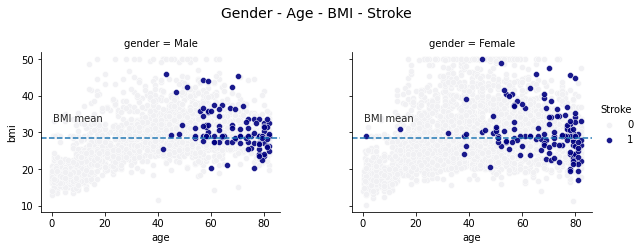

In [88]:
g = sns.FacetGrid(data, col="gender", hue='stroke', 
                  col_order=['Male', 'Female'], hue_order=[0,1],
                  aspect=1.2, size=3.5, palette=sns.light_palette('navy', 2))
g.map(plt.scatter, "age", "bmi", alpha=0.9, 
      edgecolor='white', linewidth=0.5)
fig = g.fig 

with sns.axes_style("white"):
    ax1, ax2 = g.axes[0]
    ax1.axhline(28.61, ls='--')
    ax2.axhline(28.61, ls='--')
    ax1.text(0.5,33, "BMI mean")
    ax2.text(0.5,33, "BMI mean")

fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Gender - Age - BMI - Stroke', fontsize=14)
l = g.add_legend(title='Stroke')

- **Age** is a factor, there is a clear increase in stroke rate above 40 years. Almost no Stroke below 20 years.
    - An idea would be to bin Age: 0-20,20-40, 40-60, 60-80, 80-100
- **BMI** might be a factor. High BMI seem to contribute to slightly more strokes than low BMI. We can also verify the boxplot in Section 5.2 for BMI vs. Stroke.
- **Gender** might be a factor. However, it is difficult to spot the difference in the graph. Let us take a look at the numbers.

In [115]:
pd.concat(
    [data.groupby('gender')['stroke'].value_counts().to_frame('#'),
    data.groupby('gender')['stroke'].value_counts(normalize=True).to_frame('%')*100], axis=1
)

#          %
gender stroke                 
Female 0       2854  95.292154
       1        141   4.707846
Male   0       2007  94.893617
       1        108   5.106383

% of Stroke for Men is 5.10 compared to 4.7% for Women

#### 5.6 Multicollinearity Analysis

Since correlation check only accept numerical variables, we need to transform. We use labelEncoder from sklearn.preprocessing as it will be easy to decode a particular label back later after predicting if required.  

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['gender'] = le.fit_transform(data['gender'])
data['ever_married'] = le.fit_transform(data['ever_married'])
data['work_type'] = le.fit_transform(data['work_type'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])

df_en = data
df_en.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


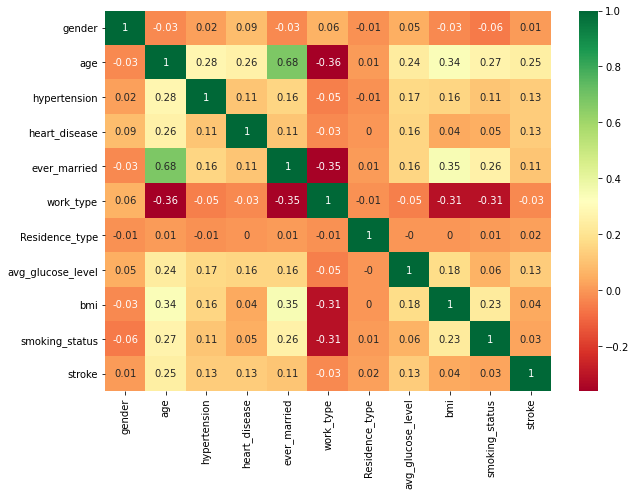

In [27]:
corr = df_en.corr().round(2)
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot = True, cmap = 'RdYlGn');

From the above correlation matrix, we can verify the presence of multicollinearity between some of the variables. For instance, the ever_married and age column has a correlation of 0.68. Between this two attributes, age contains more information on whether one is susceptible to stroke. Thus, we will drop the ever_married column.

In [28]:
df_en = df_en.drop(['ever_married'], axis = 1)
df_en.head(3)

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,2,0,105.92,32.500000,2,1


#### 5.7 Final Preprocessing

Variables measured in different scales may end up adding bias to the model. To deal with this problem, feature standardization (μ=0, σ=1) is used prior to model fitting. We have created an object of StandardScaler() and then applied fit_transform() function to apply standardization on avg_glucose_level, bmi and age columns.

In [29]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
columns = ['avg_glucose_level','bmi','age']
stand_scaled = s.fit_transform(df_en[['avg_glucose_level','bmi','age']])
stand_scaled = pd.DataFrame(stand_scaled,columns=columns)

df_en=df_en.drop(columns=columns,axis=1)
stand_scaled.head()

,avg_glucose_level,bmi,age
0,2.706375,1.066746,1.051434
1,2.121559,0.013363,0.786070
2,-0.005028,0.506346,1.626390
3,1.437358,0.766044,0.255342
4,1.501184,-0.655458,1.582163


In [30]:
df = pd.concat([df_en, stand_scaled], axis=1)
df.head(3)

,gender,hypertension,heart_disease,work_type,Residence_type,smoking_status,stroke,avg_glucose_level,bmi,age
0,1,0,1,2,1,1,1,2.706375,1.066746,1.051434
1,0,0,0,3,0,2,1,2.121559,0.013363,0.786070
2,1,0,1,2,0,2,1,-0.005028,0.506346,1.626390


### 6. Modelling

All the predictor variables will be mapped to an array x and the target variable to an array y. The target variable is ‘stroke’ column.

In [31]:
x=df.drop(['stroke'], axis=1)
y=df['stroke']
# Models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 124)

We are going to build models and storing them along with their parameters in a dictionary. The 7 algorithms that we are going to use are:

- Decision Tree
- Logistic Regression
- Random Forest
- Support Vector Machine
- K Nearest Neighbour
- Naive Bayes
- KMeans Clustering

In [32]:
models = dict()
models['Decision Tree'] = DecisionTreeClassifier()
models['Logreg'] = LogisticRegression()
models['Random Forest'] = RandomForestClassifier()
models['Support Vector Machine'] = SVC(kernel = 'sigmoid', gamma='scale')
models['kNN'] = KNeighborsClassifier()
models['Naive Bayes'] = GaussianNB()
models['KMeans'] = KMeans(n_clusters=2, n_init=10, random_state=42)
for model in models:
    
    models[model].fit(x_train, y_train)
    print(model + " model fitting completed.")

Decision Tree model fitting completed.
Logreg model fitting completed.
Random Forest model fitting completed.
Support Vector Machine model fitting completed.
kNN model fitting completed.
Naive Bayes model fitting completed.
KMeans model fitting completed.


In [33]:
print("Test Set Prediction:\n")

for x in models:

    print('-'*20+x+'-'*20)
    model = models[x]
    y_pred = model.predict(x_test)
    arg_test = {'y_true':y_test, 'y_pred':y_pred}
    print(confusion_matrix(**arg_test))
    print(classification_report(**arg_test))

Test Set Prediction:

--------------------Decision Tree--------------------
[[1392   72]
 [  63    6]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1464
           1       0.08      0.09      0.08        69

    accuracy                           0.91      1533
   macro avg       0.52      0.52      0.52      1533
weighted avg       0.92      0.91      0.91      1533

--------------------Logreg--------------------
[[1464    0]
 [  69    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1464
           1       0.00      0.00      0.00        69

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533

--------------------Random Forest--------------------
[[1462    2]
 [  69    0]]
              precision    recall  f1-score   support

           0       0.95      1.00

We see a low Recall (Sensitivity) (i.e. Predicting correctly when patient has Stroke). That means we have a lot of False Negatives.

In [36]:
print('Summary of Accuracy Score\n\n')
for i in models:
    model = models[i]
    print(i + ' Model: ',accuracy_score(y_test, model.predict(x_test)).round(4))



Summary of Accuracy Score


Decision Tree Model:  0.9119
Logreg Model:  0.955
Random Forest Model:  0.9537
Support Vector Machine Model:  0.9243
kNN Model:  0.9524
Naive Bayes Model:  0.8728
KMeans Model:  0.7834


From the accuracy summary, we see that Logistic Regression, kNN, Random Forest have high accuracy of 0.95. However, it is important to consider the error type and recall of each model. All models with high accuracy have low recall (i.e. more False Negatives). Type 2 Error.

For our Stroke Prediction project, we want to avoid Type 2 Error. That is, we are failing to correctly predict the patient having Stroke and deem them as Stroke free. Naive Bayes Model has fit our objective although the accuracy is 0.87

### 7. Cross Validation

In [38]:
from sklearn.model_selection import cross_val_score

gnb = GaussianNB()

scores = cross_val_score(gnb, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))


Cross-validation scores:[0.87430168 0.84916201 0.88826816 0.87709497 0.89944134 0.88547486
 0.86592179 0.86554622 0.86834734 0.85714286]


- Using the mean cross-validation, we can conclude that we expect the model to be around 87.31% accurate on average.
- Relatively small variance in the accuracy between 10 folds, ranging from 84.91% accuracy to 89.94% accuracy. So, we can conclude that the model is independent of the particular folds used for training.
- The cross-validation mean accuracy is greater than original accuracy of 87.38%
- We can further improve by tuning hyperparameters or adjusting the probability threshold.